# 2CSSID-TP06. SVM et RN


- Nom : 
- Prénom : 

In [1]:
import matplotlib
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.21.4', '1.3.4', '3.5.0')

In [2]:
from typing          import Tuple, List, Type
from collections.abc import Callable

## I. Réalisation des algorithmes

Dans cette partie, on va implémenter les fonctions de régression à partir de zéro (from scratch). Cela va nous permettre à comprendre COMMENT les algorithmes fonctionnement : leurs complexités (temporelles et spatiales) et leurs paramètres.
Pour ce faire, on va utiliser la bibliothèque **numpy** qui est utile dans les calcules surtout matricielles.

### I.1. SVM avec noyau (Dual)

Notre fonction de prédiction est formalisée comme : 
$$ f(X) = \sum\limits_{i=1}^{M} \theta X^{(i)} + \theta_0$$

On peut formaliser $\theta$ comme ([Hilary, A. Zisserman (2015), Lecture 3: SVM dual, kernels and regression](http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf)) : 
$$ \theta = \sum\limits_{i=1}^{M} \alpha_i X^{(i)} Y^{(i)}$$

La formation duale du problème sera : 
$$\max\limits_{\alpha_i \ge 0} \sum\limits_{i=1}^{M} \alpha_i - \frac{1}{2} \sum\limits_{i=1}^{M} \sum\limits_{j=1}^{M} \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)} x^{(j)}$$
sous les contraintes : 
$$0 \le \alpha_i \le C$$
$$\sum\limits_{i=1}^{M} \alpha_i y^{(i)} = 0$$

#### I.1.1. Noyaux

**Rien à programme ici**

On note $K(x^{(i)}, x^{(j)}) = x^{(i)} x^{(j)}$ et on l'appele un noyau linéaire.

L'idée du noyau est de chercher une séparation linéaire du problème dans un espace de dimension supérieure.
Ceci par l'application d'une fonction non linéaire sur les vecteurs d'entrée $X$.

Noyau gaussien (RBF kernel) :
$$K(x_1, x_2) = exp{(-\frac{||x_1 - x_2||^2}{2 \sigma^2})} = exp{(-\frac{\sum_i (x_1^{(i)} - x_2^{(i)})^2}{2 \sigma^2})}$$

In [3]:
def linear(X1, X2):
    return np.dot(X1, X2.T)

def RBF(X1, X2, sigma=1):
    # Le cas de calcul du kernel entre deux échantillons (entraînement)
    # résultat: un scalar
    if np.ndim(X1) == 1 and np.ndim(X2) == 1:
        result = np.exp(- (np.linalg.norm(X1 - X2, 2)) ** 2 / (2 * sigma ** 2))
    # Le cas de calcul du kernel 
    elif (np.ndim(X1) > 1 and np.ndim(X2) == 1) or (np.ndim(X1) == 1 and np.ndim(X2) > 1):
        result = np.exp(- (np.linalg.norm(X1 - X2, 2, axis=1) ** 2) / (2 * sigma ** 2))
    elif np.ndim(X1) > 1 and np.ndim(X2) > 1:
        result = np.exp(- (np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], 2, axis=2) ** 2) / (2 * sigma ** 2))
    return result

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([[ 9,  6,  3],
#         [23, 16,  9],
#         [37, 26, 15]]),
#  array([[29, 22, 15],
#         [22, 17, 12]]),
#  array([[3.35462628e-04, 6.73794700e-03, 1.83156389e-02],
#         [1.83156389e-02, 6.73794700e-03, 3.35462628e-04],
#         [3.35462628e-04, 2.26032941e-06, 2.06115362e-09]]),
#  array([[1.        , 0.36787944, 0.01831564],
#         [0.36787944, 1.        , 0.36787944]]))
#---------------------------------------------------------------------

X1_t = np.array([ # X1[3, 2]
    [1, 2],
    [3, 4],
    [5, 6]
])

X2_t = np.array([ # X2[3, 2]
    [5, 2],
    [4, 1],
    [3, 0]
])

X3_t = np.array([ # X2[3, 2]
    [5, 2],
    [4, 1]
])

linear(X1_t, X2_t), linear(X3_t, X2_t), RBF(X1_t, X2_t), RBF(X3_t, X2_t)

(array([[ 9,  6,  3],
        [23, 16,  9],
        [37, 26, 15]]),
 array([[29, 22, 15],
        [22, 17, 12]]),
 array([[3.35462628e-04, 6.73794700e-03, 1.83156389e-02],
        [1.83156389e-02, 6.73794700e-03, 3.35462628e-04],
        [3.35462628e-04, 2.26032941e-06, 2.06115362e-09]]),
 array([[1.        , 0.36787944, 0.01831564],
        [0.36787944, 1.        , 0.36787944]]))

#### I.1.2. Fonction objectif

On veut maximiser cette fonction objective :
$$W(\alpha) = \sum\limits_{i=1}^{M} \alpha_i - \frac{1}{2} \sum\limits_{i=1}^{M} \sum\limits_{j=1}^{M} \alpha_i \alpha_j y^{(i)} y^{(j)} K(x^{(i)}, x^{(j)})$$

In [4]:
# TODO Réaliser la fonction du coût SVM (dual)
def J_dual(X, Y, alphas, K=linear):
    return None


#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 1.2026367706974372
#---------------------------------------------------------------------

a_t = np.array([1., .5, .25])
X_t = np.array([[1., 2.], [2., 3.], [2., 1.]])
Y_t = np.array([1, -1, 1])

J_dual(X_t, Y_t, a_t, K=RBF)

1.2026367706974372

#### I.1.3. Fonction de décision 

$$\hat{y_t} = f(x_t) = \sum^M_{i=1} \alpha_i y^{(i)} K(x^{(i)}, x_t) - b$$
Où, 
- $x$ : les échantillons d'entraînement
- $x_t$ : les échantillons de test

In [5]:
# TODO Réaliser la fonction d'estimation SVM (dual)
def z_dual(X_test, X_train, Y_train, alphas, b, K=linear):
    return None

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([-0.28287917, -0.54510201])
#---------------------------------------------------------------------

a_t = np.array([1., .5, .25])
X_t = np.array([
    [1., 2.], 
    [2., 3.], 
    [2., 1.]])
Y_t = np.array([1, -1, 1])
X_tt = np.array([
    [1., 1.], 
    [2., 2.]])

z_dual(X_tt, X_t, Y_t, a_t, 1., K=RBF)

array([-0.28287917, -0.54510201])

#### I.1.4. Sequential minimal optimization

**Rien à programmer ou analyser ici**

Pour maximiser la fonction objectif, on va utiliser la méthode [Sequential minimal optimization)(https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf)

Ce code est une adaptation de [Implementing a Support Vector Machine using Sequential Minimal Optimization and Python 3.5](https://jonchar.net/notebooks/SVM/#Sequential-minimal-optimization)

In [6]:
def executer_etape(X, Y, alphas, b, erreurs, K, C, i1, i2, tol, eps):
    
    # Si les alphas choisis sont les mêmes, sortir
    if i1 == i2:
        return False, b
    
    alpha1 = alphas[i1]
    alpha2 = alphas[i2]
    y1 = Y[i1]
    y2 = Y[i2]
    E1 = erreurs[i1]
    E2 = erreurs[i2]
    s = y1 * y2
    
    # Compute L & H, the bounds on new possible alpha values
    if (y1 != y2):
        L = max(0, alpha2 - alpha1)
        H = min(C, C + alpha2 - alpha1)
    else:
        L = max(0, alpha1 + alpha2 - C)
        H = min(C, alpha1 + alpha2)
        
    if (L == H):
        return False, b

    # Compute kernel & 2nd derivative eta
    k11 = K(X[i1], X[i1])
    k12 = K(X[i1], X[i2])
    k22 = K(X[i2], X[i2])
    eta = 2 * k12 - k11 - k22
    
    # Compute new alpha 2 (a2) if eta is negative
    if (eta < 0):
        a2 = alpha2 - y2 * (E1 - E2) / eta
        # Clip a2 based on bounds L & H
        if a2 < L:
            a2 = L
        elif a2 > H:
            a2 = H
            
    # If eta is non-negative, move new a2 to bound with greater objective function value
    else:
        alphas_adj = alphas.copy()
        alphas_adj[i2] = L
        # objective function output with a2 = L
        Lobj = J_dual(X, Y, alphas_adj, K=K) 
        alphas_adj[i2] = H
        # objective function output with a2 = H
        Hobj = J_dual(X, Y, alphas_adj, K=K)
        if Lobj > (Hobj + eps):
            a2 = L
        elif Lobj < (Hobj - eps):
            a2 = H
        else:
            a2 = alpha2
            
    # Push a2 to 0 or C if very close
    if a2 < 1e-8:
        a2 = 0.0
    elif a2 > (C - 1e-8):
        a2 = C
    
    # If examples can't be optimized within epsilon (eps), skip this pair
    if np.abs(a2 - alpha2) < eps * (a2 + alpha2 + eps):
        return False, b
    
    # Calculate new alpha 1 (a1)
    a1 = alpha1 + s * (alpha2 - a2)
    
    # Update threshold b to reflect newly calculated alphas
    # Calculate both possible thresholds
    b1 = E1 + y1 * (a1 - alpha1) * k11 + y2 * (a2 - alpha2) * k12 + b
    b2 = E2 + y1 * (a1 - alpha1) * k12 + y2 * (a2 - alpha2) * k22 + b
    
    # Set new threshold based on if a1 or a2 is bound by L and/or H
    if 0 < a1 < C:
        b_new = b1
    elif 0 < a2 < C:
        b_new = b2
    # Average thresholds if both are bound
    else:
        b_new = (b1 + b2)/2.

    # Update model object with new alphas & threshold
    alphas[i1] = a1
    alphas[i2] = a2
    
    # Update error cache
    # Error cache for optimized alphas is set to 0 if they're unbound
    for index, alph in zip([i1, i2], [a1, a2]):
        if 0.0 < alph < C:
            erreurs[index] = 0.0
    
    # Set non-optimized errors based on equation 12.11 in Platt's book
    non_opt = [n for n in range(len(X)) if (n != i1 and n != i2)]
    erreurs[non_opt] += y1 * (a1 - alpha1) * K(X[i1], X[non_opt])
    erreurs[non_opt] += y2 * (a2 - alpha2) * K(X[i2], X[non_opt])
    erreurs[non_opt] += b - b_new
    
    return True, b_new

print("FIN")

FIN


In [7]:
def examiner_exemple(X, Y, alphas, b, erreurs, K, C, i2, tol, eps):
    M = len(X)
    y2 = Y[i2]
    alpha2 = alphas[i2]
    E2 = erreurs[i2]
    r2 = E2 * y2

    # Proceed if error is within specified tolerance (tol)
    if ((r2 < -tol and alpha2 < C) or (r2 > tol and alpha2 > 0)):
        indices_examiner2 = np.where((alphas != 0) & (alphas != C))[0]
        M2 = len(indices_examiner2)
        if M2 > 1:
            # Use 2nd choice heuristic is choose max difference in error
            if erreurs[i2] > 0:
                i1 = np.argmin(erreurs)
            else:
                i1 = np.argmax(erreurs)
                
            step_result, b = executer_etape(X, Y, alphas, b, erreurs, K, C, i1, i2, tol, eps)
            if step_result:
                return True, b
            
            # Loop through non-zero and non-C alphas, starting at a random point
            for i1 in np.roll(indices_examiner2, np.random.choice(np.arange(M2))):
                step_result, b = executer_etape(X, Y, alphas, b, erreurs, K, C, i1, i2, tol, eps)
                if step_result:
                    return True, b
        
        # loop through all alphas, starting at a random point
        for i1 in np.roll(np.arange(M), np.random.choice(np.arange(M))):
            step_result, b = executer_etape(X, Y, alphas, b, erreurs, K, C, i1, i2, tol, eps)
            if step_result:
                return True, b
    
    return False, b

print("FIN")

FIN


In [8]:
def dsvm_entrainer(X, Y, K, C=10., tol = 0.01, eps = 0.01):
    M = len(X)
    alphas = np.zeros(M)
    b = 0.0
    numChanged = 0
    examineAll = True
    objs = []
    erreurs = z_dual(X, X, Y, alphas, b, K=K) - Y
    
    while numChanged > 0 or examineAll:
        numChanged = 0
        if examineAll :
            indices_examiner = range(M)
        else: 
            indices_examiner = np.where((alphas != 0) & (alphas != C))[0]
        
        for i2 in indices_examiner:
            examine_result, b = examiner_exemple(X, Y, alphas, b, erreurs, K, C, i2, tol, eps)
            if examine_result:
                numChanged += 1
                objs.append(J_dual(X, Y, alphas, K=K))
                    
        if examineAll == True:
            examineAll = False
        elif numChanged == 0:
            examineAll = True
        
    return alphas, b, objs

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([10., 10.,  0.])
#---------------------------------------------------------------------

X_t = np.array([[0.02, -0.1], [.01, -.02], [0.15, 0.03]])
Theta_t = np.array([0., 0.])
Y_t = np.array([-1., 1., 1.])

alphas, b, obj = dsvm_entrainer(X_t, Y_t, K=RBF)

alphas

array([10., 10.,  0.])

In [9]:
class DSVM(object):
    def __init__(self, K=linear, C=10., tol = 0.01, eps = 0.01):
        self.C = C      # regularization parameter
        self.K = K     # kernel function
        self.tol = tol #tolérence des erreurs
        self.eps = eps #  
        
    def entrainer(self, X, Y):
        
        XX = np.array(X)
        self.mean = np.mean(XX, axis=0)
        self.std = np.std(XX, axis=0)
        XX  = np.where(self.std==0, XX, (XX - self.mean)/self.std)
        self.X = XX
        self.Y = Y
        self.alphas, self.b, objs = dsvm_entrainer(XX, Y, self.K, self.C, tol = self.tol, eps = self.eps)
        return objs
    
    def predire(self, X, cls=True): 
        XX = np.array(X)
        XX  = np.where(self.std==0, XX, (XX - self.mean)/self.std)
        Z = z_dual(XX, self.X, self.Y, self.alphas, self.b, self.K)
        return Z if not cls else (Z >= 0).astype(int)

    
#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([1])
#---------------------------------------------------------------------

X_t = np.array([[2., -10.], [1., -2.], [1.5, 3.]])
Y_t = np.array([0, 1, 1])
dsvm_t = DSVM(K=RBF)
dsvm_t.entrainer(X_t, Y_t)
dsvm_t.predire(np.array([[2., 6.]]))

array([1])

### I.2. RN

In [10]:
# API
class Activation(object): 
    # Calculer l'activation en se basant sur Z (la somme linéaire)
    def activer(self, Z):
        pass
    # Calculer la dérivée en se basant sur Z et l'activation A
    def deriver(self, Z, H):
        pass

# API
class Cout(object): 
    # Calculer l'activation en se basant sur Z (la somme linéaire)
    def calculer(self, H, Y):
        pass
    # Calculer la dérivée en se basant sur Z et l'activation A
    def deriver(self, H, Y):
        pass

#### I.2.1. Fonctions d'activation

L'activation logistique est calculée comme :
$$A = \sigma(Z) = \frac{1}{1+e^{-Z}}$$

La dérivée partielle est donnée par :
$$\frac{\partial \sigma(Z)}{\partial \theta} = \sigma(Z) (1-\sigma(Z))$$

In [11]:
# TODO réaliser la dérivée de la fonction d'activation logistique
def d_sigmaf(Z, A): 
    return None

def sigmaf(Z):
    return 1 / (1 + np.exp(-Z))
    
class Logistique(Activation):
    def activer(self, Z):
        return sigmaf(Z)
    def deriver(self, Z, H):
        return d_sigmaf(Z, H)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([0.84104179, 0.84290453]), array([0.1336905 , 0.13241648]))
#---------------------------------------------------------------------

logistique = Logistique()
z4_1 = np.array([1.666, 1.68])
a4_1 = logistique.activer(z4_1)
a4_1p = logistique.deriver(z4_1, a4_1)

a4_1, a4_1p

(array([0.84104179, 0.84290453]), array([0.1336905 , 0.13241648]))

#### I.2.2. Fonctions du coût

La fonction BCE est calaculée par :
$$BCE = - ( Y \log(H) + (1-Y) \log(1-H))$$

Sa dérivée est calculée par :
$$\frac{\partial BCE}{\partial \theta} = \frac{H-Y}{H - H^2}$$

In [12]:
# TODO réaliser la dérivée de la fonction d'erreur BCE
def d_bcef(H, Y):
    return None

def bcef(H, Y):
    return - (Y * np.log(H) + (1-Y) * np.log(1-H))

class BCE(Cout):
    def calculer(self, H, Y):
        return bcef(H, Y)
    def deriver(self, H, Y):
        return d_bcef(H, Y)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([1.83258146, 0.17078832]), array([ 6.25      , -1.18623962]))
#---------------------------------------------------------------------

bce = BCE()

H = np.array([0.840 , 0.843])
Y = np.array([0., 1.])
J = bce.calculer(H, Y)
DJ = bce.deriver(H, Y)

J, DJ

(array([1.83258146, 0.17078832]), array([ 6.25      , -1.18623962]))

#### I.2.3. Neurone

$$\delta^{(l)} = \frac{\partial f^{(l)}}{\partial z^{(l)}} w^{(l+1)} \delta^{(l+1)}$$

$$\frac{\partial J}{\partial w^{(l)}} = a^{(l-1)} \delta^{(l)}$$

$$\frac{\partial J}{\partial b^{(l)}} = \delta^{(l)}$$

Le produit est un produit matriciel (sur $M$) et il faut prendre la moyenne des sorties (sur $Ln$). 

La fonction qui met à jour les paramètres prend en entrée : 
- $W[Lp]$ une liste des poids; un vecteur de taille $Lp$ (le nombre des neurones de la couche précédente)
- $b$ le biais 
- $Z[M]$ la combinaison linéaire du neurone courant; un vecteur de taille $M$ (le nombre des échantillons)
- $A[M]$ l'activation du neurone courant; un vecteur de taille $M$  
- $A\_past[M, Lp]$ les activations des neurones de la couche précédente; une matrice de taille est $(M * Lp)$
- $Delta\_next[M, Ln]$ le delta calculé dans la couche suivante; une matrice de taille $M * Ln$ ($Ln$ : le nombre des neurones dans la couche suivante)
- $W\_next[Ln]$ les poids vers la couche suivante; un vecteur de taille $Ln$
- $act$ c'est un object de type "Activation"; il fournit deux méthodes : "act.activer" et "act.deriver"
- $alpha$ le pas de l'entraînement 

In [13]:
# TODO Réaliser la fonction de mise à jours des poids d'un neurone
def neurone_maj(W, b, Z, A, A_past, Delta_next, W_next, act, alpha=1.):
    Delta = None
    bn = None
    Wn = None
    return Wn, bn, Delta

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([0.49375218, 0.2046736 ]),
#  -0.30324311474187016,
#  array([ 0.00696306, -0.00047683]))
#---------------------------------------------------------------------

W_t = np.array([0.5, 0.2])
b_t = -0.3
Z_t = np.array([0.5, 2.2])
# M (l'activation actuelle)
A_t = np.array([0.62245933, 0.90024951])
# M * L (les activations de la couche précédente)
A_past_t = np.array([[2., -1.], [3., 5.]])
# L
Delta_next_t = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
W_next_t = np.array([0.3, -0.1])
act = Logistique() #la fonction d'activation

W_nouv, b_nouv, Delta_nouv = neurone_maj(W_t, b_t, Z_t, A_t, A_past_t, Delta_next_t, W_next_t, act, alpha=1.)

W_nouv, b_nouv, Delta_nouv

(array([0.49375218, 0.2046736 ]),
 -0.30324311474187016,
 array([ 0.00696306, -0.00047683]))

In [14]:
class Neurone(object):
    def __init__(self, taille_entree, activation=Logistique()):
        self.b = 0.
        self.w = np.array([0.] * taille_entree)
        self.act = activation
        
    def randomiser(self):
        self.w = np.random.rand(len(self.w))
        self.b = np.random.rand(1)[0]
        
    def __aggreger(self, X):
        return np.dot(X, self.w) + self.b
    
    def activer(self, X):
        self.a_past = X
        self.z = self.__aggreger(X)
        self.a = self.act.activer(self.z)
        return self.a
    
    def actualiser(self, delta_next, w_next, alpha=1.):
        w_ancien = self.w.copy()
        self.w, self.b, delta = neurone_maj(self.w, self.b, self.z, self.a, self.a_past, 
                                            delta_next, w_next, self.act, alpha=alpha)
        return delta, w_ancien

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# z2_1 = [0.5 2.2]
# a2_1 = [0.62245933 0.90024951]
# derivee(a2_1) = [0.23500371 0.08980033]
# ancien b = -0.3
# ancien w = [0.5 0.2]
# delta2 = [ 0.00696306 -0.00047683]
# nouveaux b = -0.30324311473938026
# nouveaux w = [0.49375218 0.2046736 ]
#---------------------------------------------------------------------

# Céation d'un neurone avec deux entrées
n = Neurone(2)
# ---------------------
#On ne doit pas affecter les poids directement 
#Ici, c'est juste pour avoir les mêmes poids du neurone de sortie dans l'exemple du cours
# On va reproduire les paramètres du neurone 1 couche cachée 1 (couche 2)
n.b = -0.3
n.w = np.array([0.5, 0.2])
# ---------------------

# M X Lp (ici c'est X : couche d'entrée)
A1 = np.array([[2., -1.], [3., 5.]])
# M X Ln (Delta de la couche suivante)
Delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
W3_1 = np.array([0.3, -0.1])


A2_1 = n.activer(A1)
print("z2_1 = " + str(n.z))
print("a2_1 = " + str(A2_1))
# la dérivée de la fonction logistique n'a pas besoin de z, donc on passe 0
print("derivee(a2_1) = " + str(n.act.deriver(0,A2_1)))
print("ancien b = " + str(n.b))

Delta2, W2_ancien = n.actualiser(Delta3, W3_1) 

print("ancien w = " + str(W2_ancien))
print("delta2 = " + str(Delta2))
print("nouveaux b = " + str(n.b))
print("nouveaux w = " + str(n.w))

z2_1 = [0.5 2.2]
a2_1 = [0.62245933 0.90024951]
derivee(a2_1) = [0.23500371 0.08980033]
ancien b = -0.3
ancien w = [0.5 0.2]
delta2 = [ 0.00696306 -0.00047683]
nouveaux b = -0.30324311473938026
nouveaux w = [0.49375218 0.2046736 ]


#### I.2.4. Couche

**Rien à programmer ici.**

Une classe qui définit une couche en indiquant le nombre des neurones (taille), le nombre de ces entrées et la fonction d'activation de ces neurones.
Cette classe comprend 3 méthodes : 
- une pour initialiser les paramètres des neurones d'une façon aléatoire
- une pour appliquer la propagatation avant 
- une pour appliquer la rétropropagation 

In [15]:
class Couche(object):
    
    def __init__(self, taille, taille_entree, activation=logistique):
        self.neurones = [Neurone(taille_entree, activation=activation) for i in range(taille)]
        
    def randomiser(self):
        for neurone in self.neurones:
            neurone.randomiser()

    def propagation_avant(self, X):
        activations = []
        for neurone in self.neurones:
            activations.append(neurone.activer(X))
        return np.array(activations).T
    
    def retro_propagation(self, delta_next, W_next, alpha=1.):
        W_anciens = []
        Deltas = []
        for i, neurone in enumerate(self.neurones):
            delta, w_ancien = neurone.actualiser(delta_next, W_next[i], alpha=alpha)
            W_anciens.append(w_ancien)
            Deltas.append(delta)
        return np.array(Deltas).T, np.array(W_anciens).T



#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# activations : [[0.62245933 0.66818777]
#  [0.90024951 0.96770454]]
# deltas : [[ 0.00696306  0.00682726]
#  [-0.00047683 -0.00017109]]
#---------------------------------------------------------------------

# la couche 2 
c2 = Couche(2, 2)

#On ne doit pas affecter les poids directement 
#Ici, c'est juste pour avoir les mêmes poids du neurone de sortie dans l'exemple du cours
c2.neurones[0].b = -0.3
c2.neurones[0].w = np.array([0.5, 0.2])
c2.neurones[1].b = 0.5
c2.neurones[1].w = np.array([0.3, 0.4])

a2 = np.array([[2., -1.], [3., 5.]])
# L
delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
w3 = np.array([[0.3, -0.1],[0.5, -0.3]])

# M X Lp (ici c'est X : couche d'entrée)
a1 = np.array([[2., -1.], [3., 5.]])
a2 = c2.propagation_avant(a1)
print("activations : " + str(a2))

Deltas2, W_anciens2 = c2.retro_propagation(delta3, w3)

print("deltas : " + str(Deltas2))

activations : [[0.62245933 0.66818777]
 [0.90024951 0.96770454]]
deltas : [[ 0.00696306  0.00682726]
 [-0.00047683 -0.00017109]]


#### I.2.5. Réseau

In [16]:
class RN(object):
    def __init__(self, taille_entree, cout=bce, alpha=1.):
        self.taille_courante = taille_entree #la taille de la dernière couche
        self.cout = cout #objet de type Cout pour calculer le cout et sa dérivée
        self.alpha = alpha
        self.couches = []

    def ajouter_couche(self, taille, activation=logistique):
        nouv_couche = Couche(taille, self.taille_courante, activation=activation)
        self.couches.append(nouv_couche)
        self.taille_courante = taille
        
    def randomiser(self):
        for couche in self.couches:
            couche.randomiser()
    
    def predire(self, X): 
        Y = X
        if self.norm:
            Y = np.where(self.std==0, X, (X - self.mean)/self.std)
            
        for couche in self.couches:
            Y = couche.propagation_avant(Y)
        if Y.ndim == 2 and Y.shape[1] == 1:
            Y = Y.flatten()
        return np.where(Y < 0.5, 0, 1)
    
    
    def _faire_iteration(self, X, Y):
        # propagation avant
        a = X
        for couche in self.couches:
            a = couche.propagation_avant(a)
            
        # calcul du cout et sa dérivée 
        YY = np.array(Y)
        if YY.ndim < 2 : 
            YY = YY[:, np.newaxis]
        J = np.mean(self.cout.calculer(a, YY))
        J_prime = self.cout.deriver(a, YY)
        
        # retropropagation 
        w_past = np.array([[1.] * self.taille_courante])
        delta_past = J_prime
        for couche in reversed(self.couches): # on commance de la dernière couche vers la première
            delta_past, w_past = couche.retro_propagation(delta_past, w_past)
        return J
    
    def entrainer(self, X, Y, nbr_it=100, norm=False):
        couts = []
        X_norm = X
        self.norm = norm
        if norm:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
            X_norm = np.where(self.std==0, X, (X - self.mean)/self.std)

        for i in range(nbr_it): 
            J = self._faire_iteration(X_norm, Y)
            couts.append(J)
        return couts
    
#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# le cout = 1.0020916974430965
# w4_1 = [0.51494626 0.56592079]
# w3_1 = [0.2665629 0.4641237]
# w3_2 = [-0.13199638 -0.33433028]
# w2_1 = [0.49375219 0.2046736 ]
# w2_2 = [0.29342937 0.40384135]
# la prédiction : [0 1]
#---------------------------------------------------------------------

X = np.array([[2., -1.], [3., 5.]])
Y = np.array([0., 1.])

rn = RN(2) #deux caractéristiques d'entrée
rn.ajouter_couche(2) #ajouter une couche avec 2 neurones (cachée)
rn.ajouter_couche(2) #ajouter une couche avec 2 neurones (cachée)
rn.ajouter_couche(1) #ajouter une couche avec 1 neurone (sortie)

#On ne doit pas affecter les poids directement 
#Ici, c'est juste pour avoir les mêmes poids du neurone de sortie dans l'exemple du cours
rn.couches[0].neurones[0].b = -0.3
rn.couches[0].neurones[0].w = np.array([0.5, 0.2])
rn.couches[0].neurones[1].b = 0.5
rn.couches[0].neurones[1].w = np.array([0.3, 0.4])

rn.couches[1].neurones[0].b = -0.3
rn.couches[1].neurones[0].w = np.array([0.3, 0.5])
rn.couches[1].neurones[1].b = -0.2
rn.couches[1].neurones[1].w = np.array([-0.1, -0.3])

rn.couches[2].neurones[0].b = 1.
rn.couches[2].neurones[0].w = np.array([0.7, 0.7])

J = rn._faire_iteration(X, Y)

print("le cout = " + str(J))
print("w4_1 = " + str(rn.couches[2].neurones[0].w))
print("w3_1 = " + str(rn.couches[1].neurones[0].w))
print("w3_2 = " + str(rn.couches[1].neurones[1].w))
print("w2_1 = " + str(rn.couches[0].neurones[0].w))
print("w2_2 = " + str(rn.couches[0].neurones[1].w))

rn.entrainer(X, Y, nbr_it=200)
print("la prédiction : " + str(rn.predire(X)))

le cout = 1.0020916974430965
w4_1 = [0.51494626 0.56592079]
w3_1 = [0.2665629 0.4641237]
w3_2 = [-0.13199638 -0.33433028]
w2_1 = [0.49375219 0.2046736 ]
w2_2 = [0.29342937 0.40384135]
la prédiction : [0 1]


## II. Application et analyse

Cette partie sert à appliquer les algorithmes, modifier les paramètres et analyser les résultats

### II.1. SVM

Ici, on va tester quelques notions théoriques. Pour ce faire, on va utiliser :
- le dataset Iris avec deux attributs et trois classes.
- le dataset Iris avec deux attributs et les deux classes difficilement séparables
- un dataset synthétique avec deux attributs et deux classes sous forme d'un cercle dans l'autre
- un dataset synthétique avec deux attributs et trois classes sous forme d'un cercle dans l'autre et une autre qui avec chevauchement

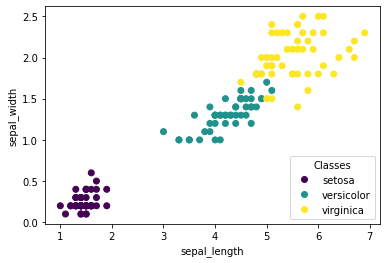

In [17]:
from sklearn import datasets

iris = datasets.load_iris()
X_iris = iris.data[:, 2:]  # on prend les deux derniers attributs
Y_iris = iris.target

scatter = plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
plt.show()

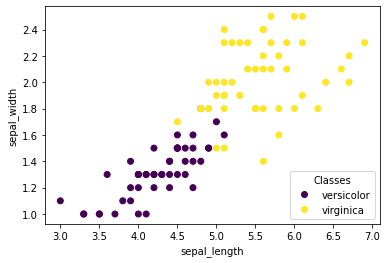

In [18]:
# supprimer les 50 premiers échantillons de "setosa"
X_irisBin = np.array(X_iris[51:, :])  # on prend les deux derniers attributs
Y_irisBin = np.array(Y_iris[51:])

# Les classes restantes ont les labels: "1" et "2"
# On les transforme à "0" et "1"
msk = Y_irisBin == 1
Y_irisBin[msk] = 0
Y_irisBin[~msk] = 1

scatter = plt.scatter(X_irisBin[:, 0], X_irisBin[:, 1], c=Y_irisBin)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend(scatter.legend_elements()[0], iris.target_names[1:], loc="lower right", title="Classes")
plt.show()

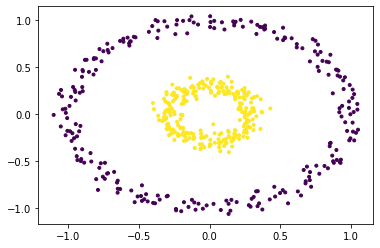

In [19]:
from sklearn.datasets import make_circles 
  
# generating data 
X_circle, Y_circle = make_circles(n_samples = 500, noise = 0.05, factor=0.3) 
  
# visualizing data 
plt.scatter(X_circle[:, 0], X_circle[:, 1], c = Y_circle, marker = '.') 
plt.show()

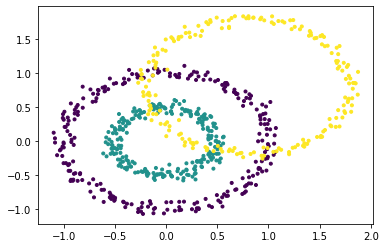

In [20]:
from sklearn.datasets import make_circles 
  
# generating data 
X_circle2, Y_circle2 = make_circles(n_samples = 500, noise = 0.05, factor=0.5)

X_circle3, Y_circle3 = make_circles(n_samples = (200, 0), noise = 0.05, factor=0.2)

X_circle2 = np.concatenate((X_circle2, X_circle3 + 0.8), axis=0)
Y_circle2 = np.concatenate((Y_circle2, Y_circle3 + 2), axis=0)


# visualizing data 
plt.scatter(X_circle2[:, 0], X_circle2[:, 1], c = Y_circle2, marker = '.') 
plt.show()

#### II.1.1. Effet du paramètre C 

Pour tester l'effet du hyper-paramètre C, on va utiliser **sklearn.svm.SVC** qui se base sur **LIBSVC** (SMO: Sequential minimal optimization). Nous avons remarqué que le temps d'exécution n'est pas stable à chaque exécution. Donc, l'idée pour régler ça est d'exécuter la même expérimentation sur plusieurs essais (trials) et essayer de garder la moyenne des temps. 

Donc, pour tester l'effet du paramètre C, nous avons déssiné 2 schémas : 

- Les marges de pédiction pour quelques valeurs de C (sur Iris binaire, pour mieux visualiser la séparation)
- Le temps d'entrainement par rapport aux valeurs de C (sur Iris 3 classes, pour avoir plus de données)


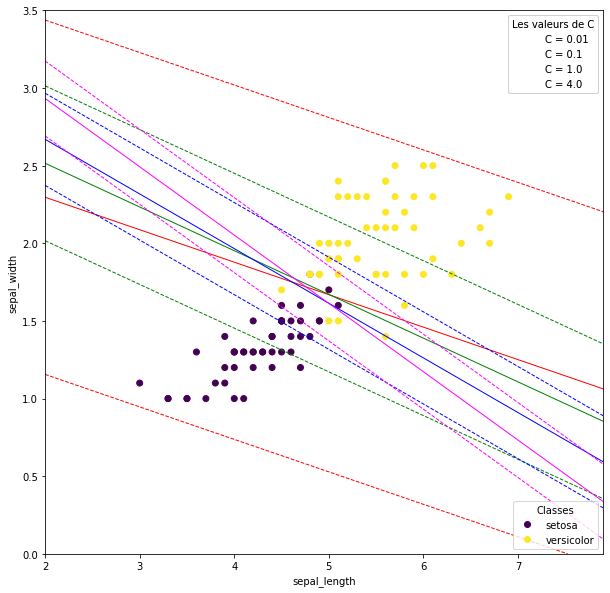

In [21]:
from sklearn.svm import SVC

def dessigner_sklearn0(modele, ax, xx, xy, color="r", label=""):
    
    Z = modele.decision_function(np.array(np.meshgrid(xx, xy)).T.reshape(-1, 2))
    grid = np.array(Z).reshape(len(xx), len(xy))
        
    # Plot decision contours using grid and
    # make a scatter plot of training data
    return ax.contour(xx, xy, grid, levels=[-1,0,1], linewidths=(1, 1, 1),
                   linestyles=('--', '-', '--'), colors=color)
    
fig, ax = plt.subplots(figsize=(10,10))

scatter = ax.scatter(X_irisBin[:, 0], X_irisBin[:, 1], c=Y_irisBin)
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
legend1 = plt.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

# generer 100 points entre le min et le max de l'attribut X[0]
xx = np.linspace(X_irisBin[:,0].min() - 1, X_irisBin[:,0].max() + 1, 100)
# generer 100 points entre le min et le max de l'attribut X[1]
xy = np.linspace(X_irisBin[:,1].min() - 1, X_irisBin[:,1].max() + 1, 100)

Csp = [0.01, 0.1, 1., 4.]
mthds = []
mthds_lbl = []
Couleurs = ["red", "green", "blue", "magenta"]

for Cp, couleur in zip(Csp, Couleurs):
    modele = SVC(C=Cp, kernel="linear", random_state=0, probability=True)
    modele.fit(X_irisBin, Y_irisBin)
    a = dessigner_sklearn0(modele, ax, xx, xy, color=couleur)
    mthds.append(a.collections[1])
    mthds_lbl.append("C = " + str(Cp))
    
legend2 = plt.legend(mthds, mthds_lbl, loc="upper right", title="Les valeurs de C")
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.show()

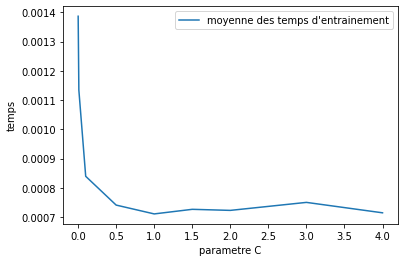

In [22]:
# from sklearn.preprocessing import StandardScaler
import timeit

TRIALS = 50

X, Y = np.repeat(X_iris, 1, axis=0), np.repeat(Y_iris, 1, axis=0)
#X, Y = X_circle2, Y_circle2

# normalisateur = StandardScaler()
# X = normalisateur.fit_transform(X)

Cs = [0.001, 0.01, 0.1, 0.5, 1., 1.5, 2., 3, 4]
Tr_stats = []

for tr in range(TRIALS):
    Cs_stats = []
    Tr_stats.append(Cs_stats)
    for C in Cs:
        modele = SVC(C=C, kernel="linear", random_state=0)
        temps_debut = timeit.default_timer()
        modele.fit(X, Y)
        Cs_stats.append(timeit.default_timer() - temps_debut)

# Temps_max = np.max(Tr_stats, axis=0)
# plt.plot(Cs, Temps_max, label="maximum des temps d'entrainement")
# Temps_min = np.min(Tr_stats, axis=0)
# plt.plot(Cs, Temps_min, label="minimum des temps d'entrainement")
Temps_moy = np.mean(Tr_stats, axis=0)
plt.plot(Cs, Temps_moy, label="moyenne des temps d'entrainement")
plt.xlabel("parametre C")
plt.ylabel("temps")
plt.legend()
plt.show()

**TODO: Analyser les résultats**

- Quelle est l'effet de la valeur C sur les marges de prédiction ?
- On remarque (en général) que le temps  d'entrainement se diminue avec des valeurs grandes de **C**. Comment **C** peut affecter ce temps ?

**Réponse**

- ...
- ...

#### II.1.2. Choix des noyaux

Dans cette expérimentation, on veut voir l'effet du choix du noyau pour un certain problème. On va tester sur le dataset Iris multiclasses. L'analyse des résultats se fait en se basant sur :

- La séparation des modèles (visualisation)
- Le F-1 score de convergence 
- Le temps d'entrainement

Les noyaux utilisés sont : 

- **linear** : un noyau linéaire 
- **poly** : un noyau polynomial avec degrée 4 
- **rbf** : un noyau radial (Radial Basis Function)
- **cosine** : un noyau avec similarity cosinus entre les échantillons


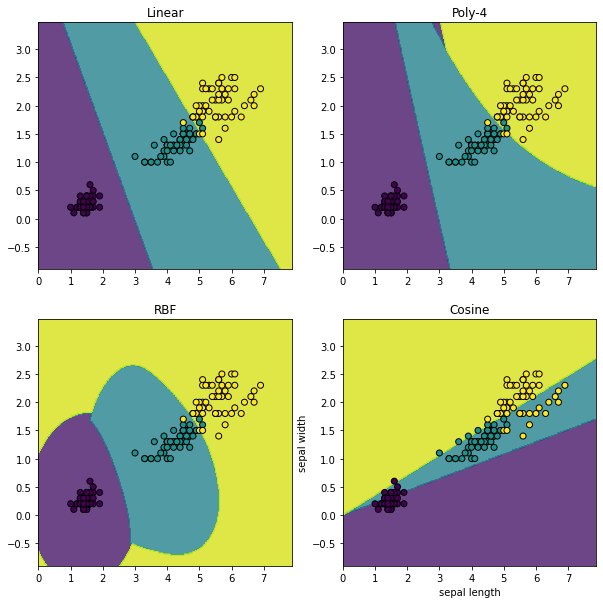

In [23]:
# Test inspiré de https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

def dessigner_sklearn(modele, ax, xx, xy, X, Y, label=""):
    
    Z = modele.predict(np.c_[xx.ravel(), xy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, xy, Z, alpha=0.8)
    
    scatter = ax.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k")
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    ax.set_title(label)
    


from sklearn.metrics.pairwise import cosine_similarity

modeles = [
    SVC(kernel="linear", random_state=0, probability=True),
    SVC(kernel="poly", degree=4, random_state=0, probability=True),
    SVC(kernel="rbf", random_state=0, gamma=0.7, probability=True),
    SVC(kernel=cosine_similarity, random_state=0, probability=True),
]

labels = [
    "Linear",
    "Poly-4",
    "RBF",
    "Cosine"
]

temps_kernel = []


fig, axs = plt.subplots(2, 2, figsize=(10,10))


xx_min, xx_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
xy_min, xy_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
xx, xy = np.meshgrid(np.arange(xx_min, xx_max, .02), np.arange(xy_min, xy_max, .02))

for modele, label, ax in zip(modeles, labels, axs.flatten()):
    temps_debut = timeit.default_timer()
    modele.fit(X_iris, Y_iris)
    temps_kernel.append(timeit.default_timer() - temps_debut)
    dessigner_sklearn(modele, ax, xx, xy, X_iris, Y_iris, label=label)

plt.show()

In [24]:
from sklearn.metrics import f1_score

perf = []

for modele in modeles:
    perf.append(f1_score(Y_iris, modele.predict(X_iris), average="micro"))

pd.DataFrame({
    "Noyau" : labels,
    "F1 entrainement" : perf,
    "Temps d'entrainement" : temps_kernel
})

,Noyau,F1 entrainement,Temps d'entrainement
0,Linear,0.966667,0.001481
1,Poly-4,0.960000,0.001948
2,RBF,0.966667,0.001974
3,Cosine,0.780000,0.004624


**TODO: Analyser les résultats**
- En se basant sur les lignes de décision et le F1-score, quel est le meilleur noyau pour ce problème à votre avis
- Pourquoi ?

**Réponse**
- ...
- ...

#### II.1.3. Problème et noyaux

Ici, on veut tester l'effet de la complexité du problème sur la séparation, ainsi que le paramétrage. On va utiliser le noyau **RBF** qui est plus souple et qui supporte des problèmes plus complexes (non séparables linéairement). On va utiliser deux critères dans cette expérimentation : 

- F1-score de convergence
- Séparation entre classes (visualisation)

Les problèmes traités sont : 

- **Iris** : séparation linéaire entre 3 classes 
- **Iris 2 classes** : séparation linéaire binaire
- **Cercle 2 classes** : séparation radiale binaire
- **Cercle 3 classes avec chevauchement** : séparation radiale, mais avec chevauchement entre classes (ici, configuration un peu différente pour RBF)


In [25]:
rbf2 = SVC(kernel="rbf", random_state=0, gamma=0.7, probability=True)
rbf2.fit(X_irisBin, Y_irisBin)

rbf3 = SVC(kernel="rbf", random_state=0, gamma=0.7, probability=True)
rbf3.fit(X_circle, Y_circle)

rbf4 = SVC(kernel="rbf", random_state=0, gamma=10., probability=True)
rbf4.fit(X_circle2, Y_circle2)

perf2 = []
perf2.append(f1_score(Y_iris, modeles[2].predict(X_iris), average="micro"))
perf2.append(f1_score(Y_irisBin, rbf2.predict(X_irisBin), average="micro"))
perf2.append(f1_score(Y_circle, rbf3.predict(X_circle), average="micro"))
perf2.append(f1_score(Y_circle2, rbf4.predict(X_circle2), average="micro"))

pd.DataFrame({
    "Problème" : ["Iris", "Iris deux classes", "Cercles", "cercles 3 classes"],
    "F1 entrainement" : perf2
})

,Problème,F1 entrainement
0,Iris,0.966667
1,Iris deux classes,0.949495
2,Cercles,1.000000
3,cercles 3 classes,0.947143


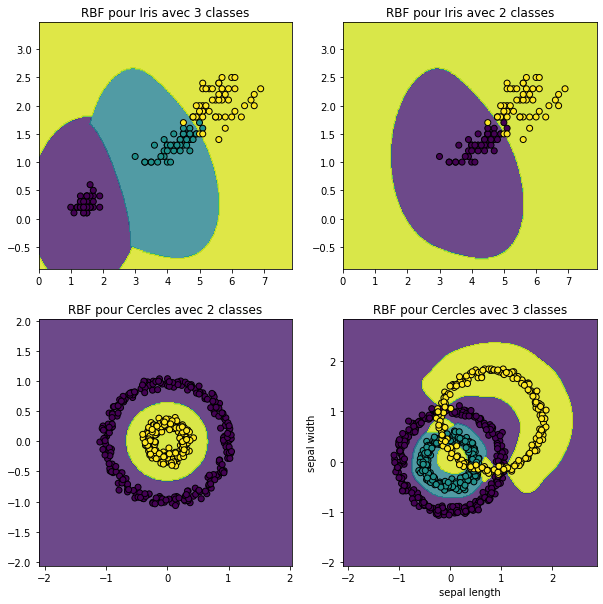

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))


dessigner_sklearn(modeles[2], ax1, xx, xy, X_iris, Y_iris, label="RBF pour Iris avec 3 classes")
dessigner_sklearn(rbf2, ax2, xx, xy, X_irisBin, Y_irisBin, label="RBF pour Iris avec 2 classes")

xx_min3, xx_max3 = X_circle[:, 0].min() - 1, X_circle[:, 0].max() + 1
xy_min3, xy_max3 = X_circle[:, 1].min() - 1, X_circle[:, 1].max() + 1
xx3, xy3 = np.meshgrid(np.arange(xx_min3, xx_max3, .02), np.arange(xy_min3, xy_max3, .02))
dessigner_sklearn(rbf3, ax3, xx3, xy3, X_circle, Y_circle, label="RBF pour Cercles avec 2 classes") 

xx_min4, xx_max4 = X_circle2[:, 0].min() - 1, X_circle2[:, 0].max() + 1
xy_min4, xy_max4 = X_circle2[:, 1].min() - 1, X_circle2[:, 1].max() + 1
xx4, xy4 = np.meshgrid(np.arange(xx_min4, xx_max4, .02), np.arange(xy_min4, xy_max4, .02))
dessigner_sklearn(rbf4, ax4, xx4, xy4, X_circle2, Y_circle2, label="RBF pour Cercles avec 3 classes")

plt.show()

**TODO: Analyser les résultats**

- Pourquoi le modèle converge mieux sur "Cercle 2 classes" malgré que c'est un problème plus complexe que les deux problèmes linéairement séparables ?
- Pourquoi le modèle donne un F1-score meilleur sur "Iris" que "Iris 2 classes" malgré ce dernier est un problème plus simple ?

**Réponse**

- Puisque il n'y a pas du chevauchement entre les échantillons des deux classes et il sont regroupés comme deux cercles ce qui est séparable par RBF.
- Puisque une classe est parfaitement séparable ce qui augmente le F1-score moyen

### II.2. RN

Ici, on va utiliser le dataset diabete

In [27]:
# diabetes2
diabetes = pd.read_csv("data/diabetes2.csv") 
X_diabetes = diabetes.iloc[:, :-1].values  
Y_diabetes = diabetes.iloc[:, -1].values

# Cette configuration est mise en place comme ceci exprès
# C'est pour tester le cas où la régression est difavorisée
NBR_TEST = 240
# Supposant que les 30% premières lignes sont pour le test et le reste pour l'entraînement
X_test = X_diabetes[-NBR_TEST:, :] # 30% ou plus
Y_test = Y_diabetes[-NBR_TEST:].reshape([-1, 1])

X_train = X_diabetes[:-NBR_TEST, :] 
Y_train = Y_diabetes[:-NBR_TEST].reshape([-1, 1])

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)

X_trains[:5, :]

array([[ 0.63564802,  0.83833016,  0.16863427,  0.93506705, -0.67560188,
         0.22006711,  0.42947843,  1.43582544],
       [-0.85203884, -1.09137813, -0.14214721,  0.55085273, -0.67560188,
        -0.63225191, -0.38057337, -0.18535642],
       [ 1.23072277,  1.91039032, -0.24574104, -1.30618316, -0.67560188,
        -1.03405944,  0.56155209, -0.10003106],
       [-0.85203884, -0.96885697, -0.14214721,  0.16663841,  0.12145706,
        -0.44961212, -0.92060791, -1.03861003],
       [-1.14957621,  0.50139697, -1.48886696,  0.93506705,  0.74892899,
         1.37678577,  5.30446409, -0.0147057 ]])

#### II.2.1. Paramètres initiaux et complexité

Ici, on veut tester l'intêt de l'initialisation des paramètres (thétas) et la complexité du modèle.
Pour ce faire, on a entrainé 5 modèles et récupéré l'erreur d'entrainement et de validation. 
Les modèles testé sont :
- **Log0** : Un seule neurone (régression logistique) avec initialisation 0
- **LogR** : Un seule neurone (régression logistique) avec initialisation aléatoire
- **RN0** : Un réseau de neurone 4(relu)X2(relu)X1(sigmoid) avec initialisation 0
- **RN1** : Un réseau de neurone 4(relu)X2(relu)X1(sigmoid) avec initialisation 1
- **RNR** : Un réseau de neurone 4(relu)X2(relu)X1(sigmoid) avec initialisation aléatoire


2021-12-12 20:59:07.804428: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


entrainement : regression theta=0 ...
entrainement : regression theta=random ...
entrainement : RN theta=0 ...
entrainement : RN theta=1 ...
entrainement : RN theta=random ...


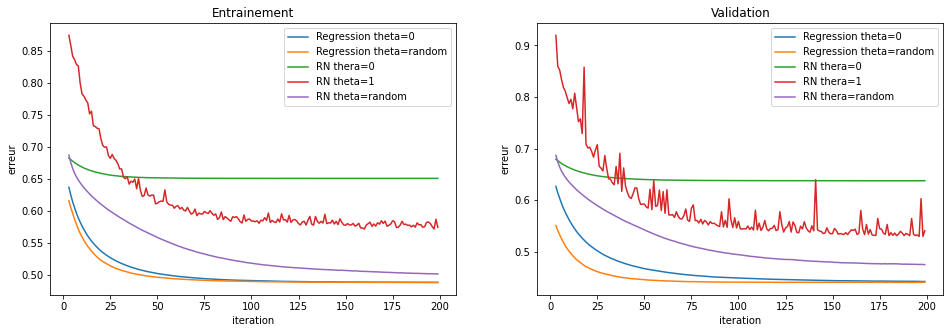

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model

alpha=0.01
NBR_IT = 200

M, N = X_train.shape

reg0 = Sequential()
reg0.add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

reg0.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : regression theta=0 ...")
results = reg0.fit(X_trains, Y_train, epochs=NBR_IT, validation_data=(X_tests, Y_test), verbose=0)

regr = Sequential()
regr.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

regr.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : regression theta=random ...")
resultsr = regr.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)


reg_m0 = Sequential()
reg_m0.add(Dense(4, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
reg_m0.add(Dense(2, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
reg_m0.add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

reg_m0.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : RN theta=0 ...")
results_m0 = reg_m0.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)

reg_m1 = Sequential()
reg_m1.add(Dense(4, activation="relu", kernel_initializer='one', bias_initializer='one'))
reg_m1.add(Dense(2, activation="relu", kernel_initializer='one', bias_initializer='one'))
reg_m1.add(Dense(1, activation="sigmoid", kernel_initializer='one', bias_initializer='one'))

reg_m1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : RN theta=1 ...")
results_m1 = reg_m1.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)


reg_mr = Sequential()
reg_mr.add(Dense(4, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
reg_mr.add(Dense(2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
reg_mr.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

reg_mr.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))

print("entrainement : RN theta=random ...")
results_mr = reg_mr.fit(X_trains, Y_train, validation_data=(X_tests, Y_test), epochs=NBR_IT, verbose=0)

# on n'affiche pas les 3 premières itérations, le temps que le modèle se stabilise
# sinon, un modèle peut avoir une grande valeur par rapport aux autres 
# donc, on ne peut pas visualiser la convergence des autres
IT_range = range(NBR_IT)[3:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.title.set_text("Entrainement")
ax1.plot(IT_range, results.history["loss"][3:], label="Regression theta=0")
ax1.plot(IT_range, resultsr.history["loss"][3:], label="Regression theta=random")
ax1.plot(IT_range, results_m0.history["loss"][3:], label="RN thera=0")
ax1.plot(IT_range, results_m1.history["loss"][3:], label="RN theta=1")
ax1.plot(IT_range, results_mr.history["loss"][3:], label="RN theta=random")
ax1.set(xlabel='iteration', ylabel='erreur')
ax1.legend()

ax2.title.set_text("Validation")
ax2.plot(IT_range, results.history["val_loss"][3:], label="Regression theta=0")
ax2.plot(IT_range, resultsr.history["val_loss"][3:], label="Regression theta=random")
ax2.plot(IT_range, results_m0.history["val_loss"][3:], label="RN thera=0")
ax2.plot(IT_range, results_m1.history["val_loss"][3:], label="RN thera=1")
ax2.plot(IT_range, results_mr.history["val_loss"][3:], label="RN thera=random")
ax2.set(xlabel='iteration', ylabel='erreur')
ax2.legend()
plt.show()

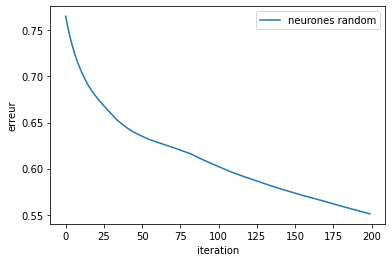

In [30]:
# Une autre façon pour le faire (gérer la boucle nous même)
# C'est juste pour ceux/celles intéressé(e)s par l'amélioration du temps d'entrainement
# Entrainer les modèles dans une seule boucle 
alpha=0.1
NBR_IT = 200



M, N = X_train.shape

inputs = Input(shape=(None,N), name="digits")

x1 = Dense(4, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')(inputs)
x2 = Dense(2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')(x1)
outputs = Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform', name="predictions")(x2)
model = Model(inputs=inputs, outputs=outputs)


loss=tf.keras.losses.BinaryCrossentropy()
optimizer=tf.keras.optimizers.SGD(learning_rate=alpha)

# print("entrainement ...")
# results = reg0.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

hist = []
for epoch in range(NBR_IT):
    with tf.GradientTape() as tape:
        H_train = model(X_trains, training=True)  # Logits for this minibatch
        # Compute the loss value for this minibatch.
        J_train = loss(Y_train, H_train)
    dJ_train = tape.gradient(J_train, model.trainable_weights)
    optimizer.apply_gradients(zip(dJ_train, model.trainable_weights))
    hist.append(J_train.numpy().mean())
        
plt.plot(range(NBR_IT), hist, label="neurones random")
plt.xlabel("iteration")
plt.ylabel("erreur")
plt.legend()
plt.show()


**TODO: Analyser les résultats**
- On remarque que les modèles avec régression convergent plus rappidement que les modèles de réseau de neurones (en terme des itérations et en terme de temps). Pourquoi ?
- On remarque que **RN0** ne s'améliore pas (il stagne dès les premières itérations). Expliquer pourquoi.
- On remarque que **RN1** s'améliore par rapport à **RN0**, mais il stagne rapidement par rapport **RNR**. Expliquer pourquoi.
- En remarquant la validation, quelle est le rapport entre le nombre des couches, la complexité du problème, le nombre/qualité des données et les problèmes d'apprentissage (sous/sur). Mentionner toutes les combinaisons qui peuvent causer des problèmes.

**Réponse**
- Le problème est simple et ne nécessite pas un modèle complexe
- Lorsque les thetas sont mis à zéro, les gradients vont être annulés lorsqu'il y a plusieurs couches. Donc, les thétas de la première couche caché vont avoir toujours un zéro
- Lorsque les neurones ont les mêmes thétas initiales, ils vont apprendre de la même façon ==> redondance
- Plus de couches + problème simple = sur-apprentissage;  Moins de couches + problème complexe + moins de données = sous-apprentissage

#### II.2.2. Fonctions d'activation

Ici, on veut tester l'utilisation des fonctions d'activation dans les couches cachées et la couche de sortie.
Pour ce faire, on a entrainé 5 modèles et récupéré l'erreur d'entrainement dans chaque itération. 
Les modèles testé sont :
- **relu->sigmoid** : un réseau avec **relu** dans les couches cachées et **sigmoid** dans la couche de sortie
- **sigmoid->sigmoid** : un réseau avec **sigmoid** dans les couches cachées et **sigmoid** dans la couche de sortie
- **tanh->sigmoid** : un réseau avec **tanh** dans les couches cachées et **sigmoid** dans la couche de sortie
- **sigmoid->relu** : un réseau avec **sigmoid** dans les couches cachées et **relu** dans la couche de sortie
- **relu->relu** : un réseau avec **relu** dans les couches cachées et **relu** dans la couche de sortie


entrainement ...
entrainement ...
entrainement ...
entrainement ...
entrainement ...


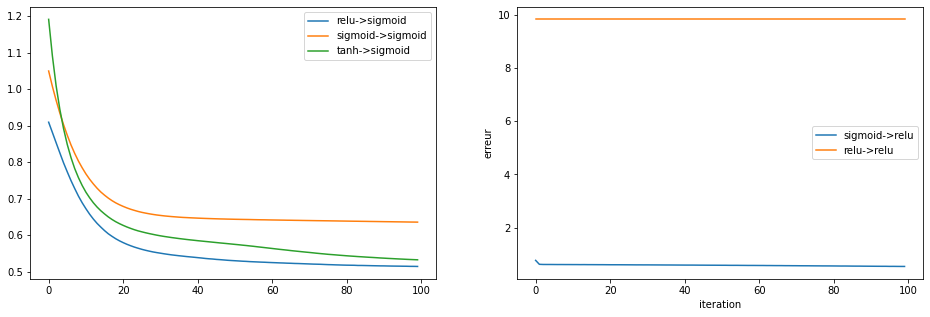

In [31]:
alpha=0.01
NBR_IT = 100

M, N = X_train.shape

L1 = 2
L2 = 2

m1 = Sequential()
m1.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m1.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m1.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m1 = m1.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m2 = Sequential()
m2.add(Dense(L1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m2.add(Dense(L2, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m2.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m2 = m2.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m3 = Sequential()
m3.add(Dense(L1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m3.add(Dense(L2, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m3.add(Dense(1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m3 = m3.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m4 = Sequential()
m4.add(Dense(L1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m4.add(Dense(L2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m4.add(Dense(1, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m4 = m4.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)

m5 = Sequential()
m5.add(Dense(L1, activation="tanh", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m5.add(Dense(L2, activation="tanh", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m5.add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
m5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=alpha))
print("entrainement ...")
results_m5 = m5.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.plot(range(NBR_IT), results_m1.history["loss"], label="relu->sigmoid")
ax1.plot(range(NBR_IT), results_m2.history["loss"], label="sigmoid->sigmoid")
ax1.plot(range(NBR_IT), results_m5.history["loss"], label="tanh->sigmoid")
ax1.legend()
ax2.plot(range(NBR_IT), results_m3.history["loss"], label="sigmoid->relu")
ax2.plot(range(NBR_IT), results_m4.history["loss"], label="relu->relu")
plt.xlabel("iteration")
plt.ylabel("erreur")
plt.legend()
plt.show()

**TODO: Analyser les résultats**
- On remarque que le modèle **sigmoid->sigmoid** a stagné rapidement. Expliquer comment ?
- On remarque que le modèle converge plus rappidement (en terme de nombre des itérations) par rapport aux deux modèles avec sortie **sigmoid**. Pourquoi ?
- On remarque que les modèles avec **relu** ne sont pas stables ; à chaque exécution, on aura un diagramme différent (des fois amélioration, des fois détérioration, etc.). Il faut noter que l'initialisation aléatoire n'est pas la source du problème vu qu'il y a d'autres modèles similaires mais stables. Donc, pourquoi nous avons eu ce comportement ?

**Réponse**
- Gradient vanishement
- Relu diminue le problème de disparition des paramètres et donne plus de plages pour les mêtre à jours
- Relu a une plage de -infini, +infini or la sortie a une plage 0, 1. Donc, il est difficile à apprendre une plage plus restreint.